In [ ]:
!pip install pandas pyarrow

In [ ]:
import pandas as pd

# 1. Define el nombre del archivo
nombre_archivo = "at_urg_respiratorio_semanal.parquet"

# 2. Lee el archivo Parquet y almacénalo en un DataFrame (df)
# Pandas automáticamente usará 'pyarrow' si está instalado.
try:
    df = pd.read_parquet(nombre_archivo)

    # 3. Muestra las primeras 5 filas para verificar que se leyó correctamente
    print("¡Archivo Parquet leído con éxito!")
    print("\nPrimeras 5 filas:")
    print(df.head())

    # 4. Muestra información sobre las columnas y tipos de datos
    print("\nInformación del DataFrame:")
    df.info()

except Exception as e:
    print(f"Ocurrió un error al intentar leer el archivo: {e}")

# 'df' ahora es un DataFrame de pandas que contiene todos tus datos.

¡Archivo Parquet leído con éxito!

Primeras 5 filas:
  EstablecimientoCodigo                    EstablecimientoGlosa RegionCodigo  \
0                115105    Hospital San Vicente de Tagua -Tagua            6   
1                129103                  Hospital de Collipulli            9   
2                200738                           SUR Punitaqui            4   
3                120805                             SAR Cabrero            8   
4                106103  Hospital Claudio Vicuña ( San Antonio)            5   

                                RegionGlosa ComunaCodigo  ComunaGlosa  \
0  Región Del Libertador Gral. B. O'Higgins         6117  San Vicente   
1                    Región De La Araucanía         9202   Collipulli   
2                        Región De Coquimbo         4304    Punitaqui   
3                         Región Del Bíobío         8303      Cabrero   
4                      Región De Valparaíso         5601  San Antonio   

  ServicioSaludCodigo      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3187490 entries, 0 to 3187489
Data columns (total 25 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   EstablecimientoCodigo      object
 1   EstablecimientoGlosa       object
 2   RegionCodigo               object
 3   RegionGlosa                object
 4   ComunaCodigo               object
 5   ComunaGlosa                object
 6   ServicioSaludCodigo        object
 7   ServicioSaludGlosa         object
 8   TipoEstablecimiento        object
 9   DependenciaAdministrativa  object
 10  NivelAtencion              object
 11  TipoUrgencia               object
 12  Latitud                    object
 13  Longitud                   object
 14  NivelComplejidad           object
 15  Anio                       int32 
 16  SemanaEstadistica          int32 
 17  OrdenCausa                 int32 
 18  Causa                      object
 19  NumTotal                   int32 
 20  NumMenor1Anio           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Paso 1: Preparación de la Columna Temporal ---
# Creamos una columna temporal única en formato "YYYY-WW" para asegurar el orden correcto en el tiempo.
# Usamos .zfill(2) para rellenar con ceros y asegurar el formato de semana de dos dígitos.
df['Temporal'] = df['Anio'].astype(str) + '-' + df['SemanaEstadistica'].astype(str).str.zfill(2)

# --- Paso 2: Agregación de Datos ---
# Agrupamos por la nueva columna 'Temporal' y sumamos el 'NumTotal' de atenciones.
df_tendencia = df.groupby('Temporal')['NumTotal'].sum().reset_index()

# --- Paso 3: Generación del Gráfico (Curva Epidémica) ---
plt.figure(figsize=(15, 6))
plt.plot(df_tendencia['Temporal'], df_tendencia['NumTotal'], marker='o', linestyle='-', color='#0077b6', linewidth=2, markersize=4)

plt.title('Curva Epidémica Semanal de Atenciones de Urgencia Respiratoria', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número Total de Atenciones', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Para no saturar el eje X, mostramos solo algunas etiquetas
n_ticks = len(df_tendencia)
plt.xticks(df_tendencia['Temporal'][::max(1, n_ticks // 20)], rotation=45, ha='right')
plt.tight_layout()

plt.savefig("curva_epidemica_total.png")
plt.close()

# Mostrar las primeras filas del resultado agregado
print("\n--- Resultado Agregado de Tendencia Temporal (df_tendencia.head()) ---")
print(df_tendencia.head())


--- Resultado Agregado de Tendencia Temporal (df_tendencia.head()) ---
  Temporal  NumTotal
0  2014-01     75283
1  2014-02    119009
2  2014-03    105264
3  2014-04    100383
4  2014-05     98844


In [ ]:
# --- Paso 1: Preparación de los Datos para Grupos de Edad ---
# Definir las columnas de interés por grupo de edad
columnas_edad = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# 1.1 Asegurar la columna 'Temporal' (si no se hizo en el paso anterior)
if 'Temporal' not in df.columns:
    df['Temporal'] = df['Anio'].astype(str) + '-' + df['SemanaEstadistica'].astype(str).str.zfill(2)

# 1.2 Agrupar por la columna temporal y sumar los casos por grupo de edad
df_edad = df.groupby('Temporal')[columnas_edad].sum().reset_index()

# 1.3 Renombrar las columnas para una mejor leyenda
df_edad.columns = ['Temporal', 'Menor de 1 año', '1 a 4 años', '5 a 14 años', '15 a 64 años', '65 o más']

# --- Paso 2: Generación del Gráfico de Líneas Agrupadas ---
plt.figure(figsize=(15, 7))

for col in df_edad.columns[1:]:
    plt.plot(df_edad['Temporal'], df_edad[col], label=col, linewidth=2)

plt.title('Atenciones de Urgencia Respiratoria por Grupo de Edad', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número de Atenciones', fontsize=12)
plt.legend(title='Grupo Etario', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mismo manejo de etiquetas que antes para evitar saturación
n_ticks = len(df_edad)
plt.xticks(df_edad['Temporal'][::max(1, n_ticks // 20)], rotation=45, ha='right')
plt.tight_layout()

plt.savefig("tendencia_por_edad.png")
plt.close()

# Mostrar las primeras filas del resultado agregado
print("\n--- Resultado Agregado de Tendencia por Edad (df_edad.head()) ---")
print(df_edad.head())


--- Resultado Agregado de Tendencia por Edad (df_edad.head()) ---
  Temporal  Menor de 1 año  1 a 4 años  5 a 14 años  15 a 64 años  65 o más
0  2014-01            6955       16703        12255         33108      6262
1  2014-02           11022       25923        20575         51401     10088
2  2014-03           10012       22690        18342         45478      8742
3  2014-04            9364       21321        17902         43647      8149
4  2014-05            9324       20491        17106         43737      8186


In [ ]:
df_causas = df.groupby(['Temporal', 'Causa'])['NumTotal'].sum().unstack(fill_value=0)
# Luego, podrías graficar las 5 causas principales.

In [ ]:
# --- Análisis 3: Distribución Geográfica por Región ---

# Paso 1: Agrupar por región y sumar el total de atenciones
df_region = df.groupby('RegionGlosa')['NumTotal'].sum().reset_index()

# Paso 2: Ordenar de forma descendente para ver las regiones más afectadas
df_region = df_region.sort_values(by='NumTotal', ascending=False)

# Paso 3: Generación del Gráfico de Barras
plt.figure(figsize=(12, 7))
bars = plt.bar(df_region['RegionGlosa'], df_region['NumTotal'], color='#00b894')

plt.title('Total de Atenciones Respiratorias por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Número Total de Atenciones', fontsize=12)
plt.xticks(rotation=60, ha='right') # Rotar etiquetas para mejor lectura

# Opcional: Añadir la cifra exacta sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=9)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig("distribucion_por_region.png")
plt.close()

print("\n--- Ranking de Atenciones por Región ---")
print(df_region)


--- Ranking de Atenciones por Región ---
                                          RegionGlosa  NumTotal
16                   Región Metropolitana de Santiago  39222639
13                                  Región Del Bíobío  13640355
10                               Región De Valparaíso   9111439
15                                   Región Del Maule   8835684
6                                 Región De Los Lagos   6456830
14           Región Del Libertador Gral. B. O'Higgins   5476367
5                              Región De La Araucanía   4809108
4                                  Región De Coquimbo   3982488
7                                  Región De Los Ríos   3304687
0                               Región De Antofagasta   2998674
12                                    Región De Ñuble   2816371
9                                  Región De Tarapacá   2259976
2                                   Región De Atacama   2213617
8      Región De Magallanes y de la Antártica Chilena   130082

In [ ]:
# --- Análisis 4: Top Causas de Atención ---

# Paso 1: Agrupar por la descripción de la causa y sumar el total de atenciones
df_causas = df.groupby('Causa')['NumTotal'].sum().reset_index()

# Paso 2: Ordenar y seleccionar el Top 10 de causas
df_top_causas = df_causas.sort_values(by='NumTotal', ascending=False).head(10)

# Paso 3: Generación del Gráfico de Barras Horizontal
plt.figure(figsize=(10, 8))
# Usamos un gráfico horizontal para que las etiquetas de texto largo se lean bien
bars = plt.barh(df_top_causas['Causa'], df_top_causas['NumTotal'], color='#ff7675')

plt.title('Top 10 Causas de Urgencia Respiratoria', fontsize=16)
plt.xlabel('Número Total de Atenciones', fontsize=12)
plt.ylabel('Causa / Diagnóstico', fontsize=12)
plt.gca().invert_yaxis() # Invierte el eje Y para que la causa más alta quede arriba

# Opcional: Añadir el valor sobre la barra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, int(xval), va='center', ha='left', fontsize=9)

plt.tight_layout()

plt.savefig("top_causas.png")
plt.close()

print("\n--- Top 10 de Causas ---")
print(df_top_causas)


--- Top 10 de Causas ---
                                                Causa  NumTotal
11                  TOTAL CAUSAS SISTEMA RESPIRATORIO  50872359
7                                  IRA Alta (J00-J06)  33592766
0            Bronquitis/bronquiolitis aguda (J20-J21)   7298978
2               Covid-19, Virus no identificado U07.2   4909420
10  Otra causa respiratoria (J22, J30-J39, J47, J6...   4823000
3              Crisis obstructiva bronquial (J40-J46)   2430646
9                                  Neumonía (J12-J18)   1893523
1                  Covid-19, Virus identificado U07.1    953975
6   HOSPITALIZACIONES POR CAUSAS SISTEMA RESPIRATORIO    841336
8                                 Influenza (J09-J11)    833446


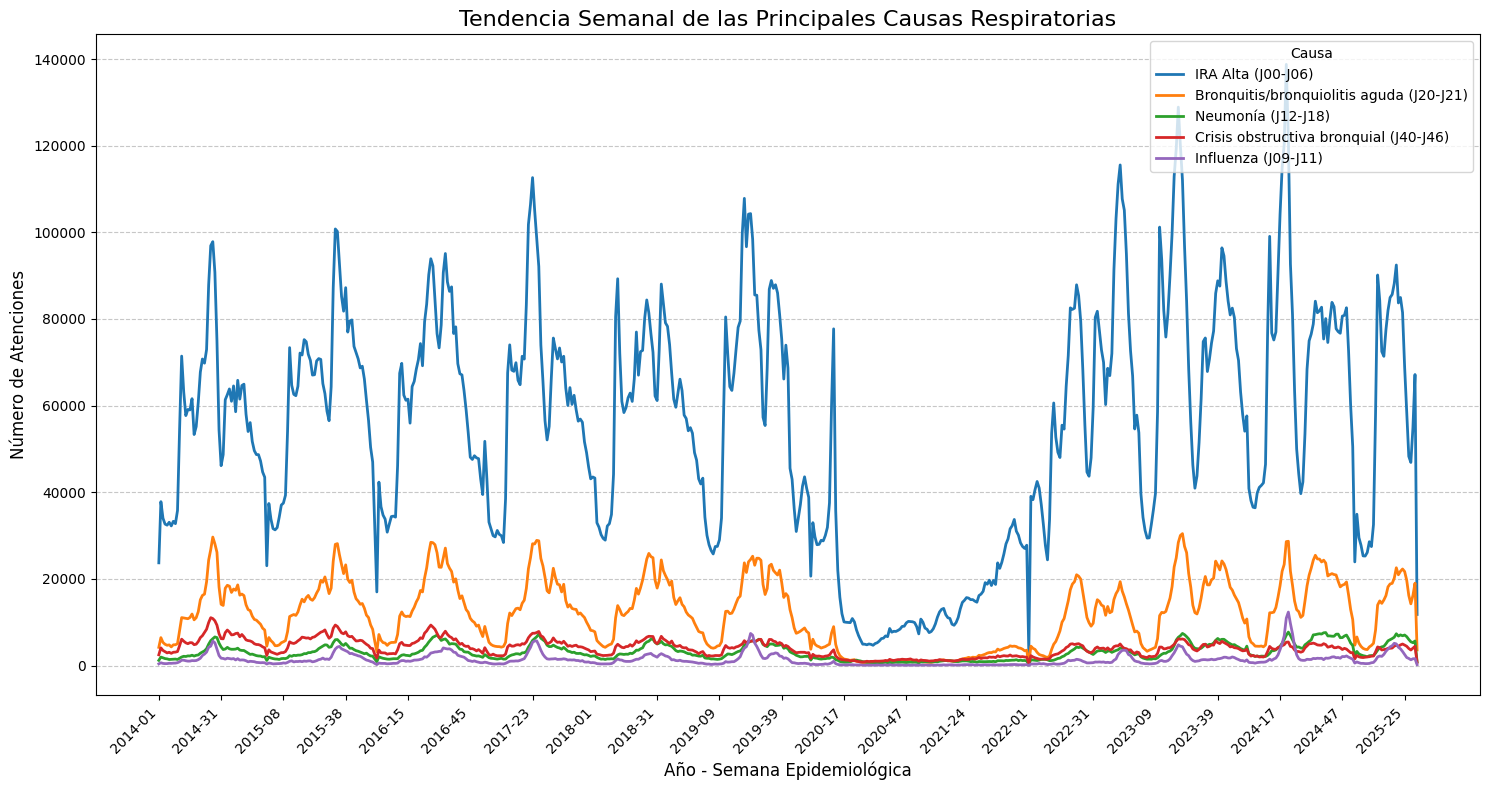


--- Vista de la Tendencia por Causas (df_causas_tendencia.head()) ---
Causa Temporal  Bronquitis/bronquiolitis aguda (J20-J21)  \
0      2014-01                                      4198   
1      2014-02                                      6437   
2      2014-03                                      5333   
3      2014-04                                      4907   
4      2014-05                                      4675   

Causa  Crisis obstructiva bronquial (J40-J46)  IRA Alta (J00-J06)  \
0                                        2479               23706   
1                                        4079               37831   
2                                        3486               34004   
3                                        3205               32651   
4                                        2918               32406   

Causa  Influenza (J09-J11)  Neumonía (J12-J18)  
0                      383                1192  
1                      639                1953  
2     

In [ ]:
# --- Análisis 5: Tendencia de las 5 Causas Más Relevantes (sin incluir TOTAL y OTRAS) ---

# 1. Seleccionar las causas de interés para el gráfico
causas_foco = [
    'IRA Alta (J00-J06)',
    'Bronquitis/bronquiolitis aguda (J20-J21)',
    'Neumonía (J12-J18)',
    'Crisis obstructiva bronquial (J40-J46)',
    'Influenza (J09-J11)' # Puedes incluir U07.2 si quieres ver la ola de COVID
]

# 2. Filtrar el DataFrame original para incluir solo estas causas
df_causas_foco = df[df['Causa'].isin(causas_foco)]

# 3. Agrupar por la semana (Temporal) y por la Causa
df_causas_tendencia = df_causas_foco.groupby(['Temporal', 'Causa'])['NumTotal'].sum().unstack(fill_value=0)
df_causas_tendencia = df_causas_tendencia.reset_index()

# 4. Generación del Gráfico de Líneas Agrupadas
plt.figure(figsize=(15, 8))

for causa in causas_foco:
    if causa in df_causas_tendencia.columns:
        plt.plot(df_causas_tendencia['Temporal'], df_causas_tendencia[causa], label=causa, linewidth=2)

plt.title('Tendencia Semanal de las Principales Causas Respiratorias', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número de Atenciones', fontsize=12)
plt.legend(title='Causa', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Manejo de etiquetas X (igual que antes)
n_ticks = len(df_causas_tendencia)
plt.xticks(df_causas_tendencia['Temporal'][::max(1, n_ticks // 20)], rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\n--- Vista de la Tendencia por Causas (df_causas_tendencia.head()) ---")
print(df_causas_tendencia.head())

In [ ]:
# --- Análisis 6: Neumonía por Grupo de Edad ---

# 1. Filtrar solo los datos de Neumonía
df_neumonia = df[df['Causa'] == 'Neumonía (J12-J18)']

# 2. Definir las columnas de edad y la nueva temporal
columnas_edad = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# 3. Agrupar por semana y sumar los casos de Neumonía por edad
df_neumonia_edad = df_neumonia.groupby('Temporal')[columnas_edad].sum().reset_index()

# 4. Sumar el total de Neumonía por grupo de edad para un ranking
ranking_neumonia = df_neumonia_edad[columnas_edad].sum().sort_values(ascending=False)

print("\n--- Ranking de Neumonía por Grupo de Edad (Total Histórico) ---")
print(ranking_neumonia)

# Puedes generar un gráfico de barras similar al de región, pero usando este ranking.


--- Ranking de Neumonía por Grupo de Edad (Total Histórico) ---
Num65oMas        791897
Num15a64Anios    548430
Num1a4Anios      282337
Num5a14Anios     168932
NumMenor1Anio    101927
dtype: int64


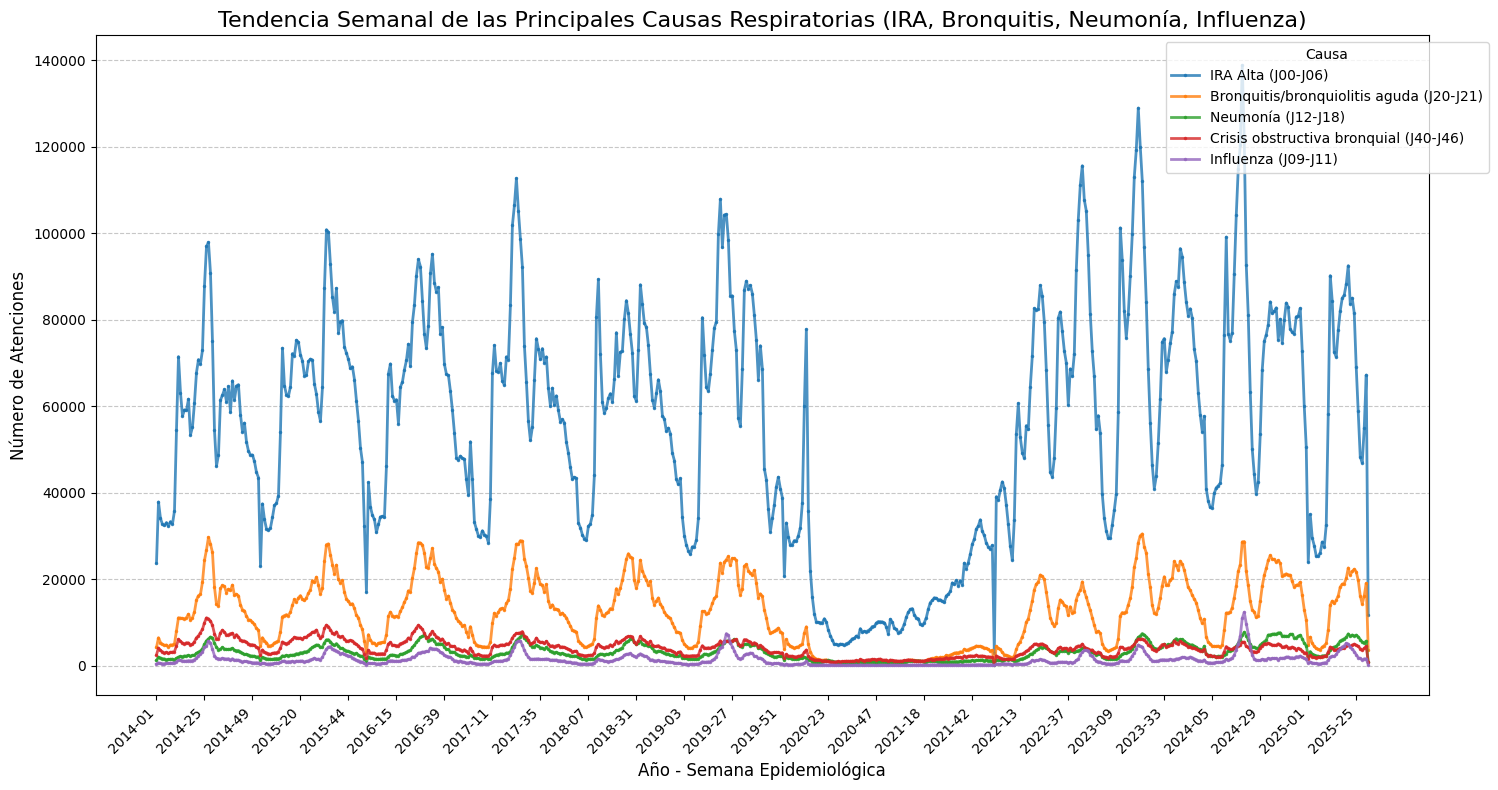

Se ha generado el gráfico 'tendencia_causas_principales.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Definir las Causas de Interés ---
# Seleccionamos las causas que representan las enfermedades más comunes o graves.
causas_foco = [
    'IRA Alta (J00-J06)',                           # Resfriado Común (Alta demanda)
    'Bronquitis/bronquiolitis aguda (J20-J21)',    # Clave en pediatría
    'Neumonía (J12-J18)',                          # Gravedad alta
    'Crisis obstructiva bronquial (J40-J46)',      # Asma/EPOC
    'Influenza (J09-J11)'                          # Virus de la gripe
    # Puedes incluir 'Covid-19, Virus no identificado U07.2' si quieres ver su ola
]

# --- 2. Preparación de Datos ---
# Filtrar el DF original y agrupar por semana y causa
df_causas_foco = df[df['Causa'].isin(causas_foco)]
df_causas_tendencia = df_causas_foco.groupby(['Temporal', 'Causa'])['NumTotal'].sum().unstack(fill_value=0)
df_causas_tendencia = df_causas_tendencia.reset_index()

# --- 3. Generación del Gráfico de Líneas Agrupadas ---
plt.figure(figsize=(15, 8))

for causa in causas_foco:
    if causa in df_causas_tendencia.columns:
        plt.plot(
            df_causas_tendencia['Temporal'],
            df_causas_tendencia[causa],
            label=causa,
            linewidth=2,
            marker='.',
            markersize=3,
            alpha=0.8
        )

# --- 4. Configuración Visual del Gráfico ---
plt.title('Tendencia Semanal de las Principales Causas Respiratorias (IRA, Bronquitis, Neumonía, Influenza)', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número de Atenciones', fontsize=12)
plt.legend(title='Causa', loc='upper right', bbox_to_anchor=(1.05, 1)) # Colocar leyenda fuera para no tapar líneas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Manejo de etiquetas X: Mostrar solo las etiquetas que representan el inicio de un nuevo año o cada cierto intervalo
n_ticks = len(df_causas_tendencia)
tick_interval = max(1, n_ticks // 25) # Ajusta el intervalo para mostrar un máximo de 25 etiquetas
plt.xticks(df_causas_tendencia['Temporal'][::tick_interval], rotation=45, ha='right')

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("tendencia_causas_principales.png") # Guarda el archivo
plt.close()

print("Se ha generado el gráfico 'tendencia_causas_principales.png'.")

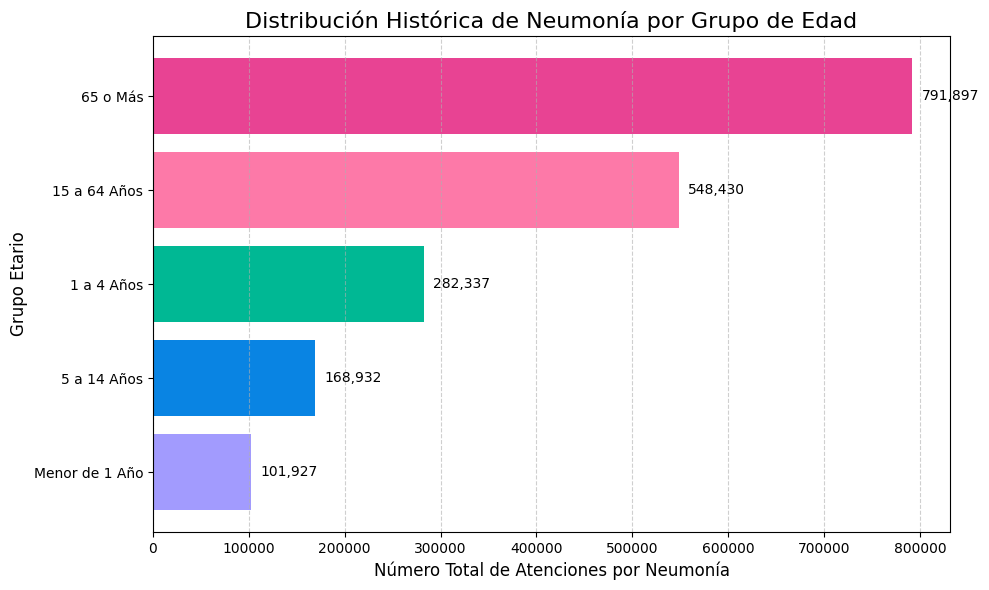

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Crear el DataFrame a partir del Ranking Proporcionado ---
# Usaremos los datos que me pasaste para crear una Serie de pandas
data_neumonia = {
    '65 o Más': 791897,
    '15 a 64 Años': 548430,
    '1 a 4 Años': 282337,
    '5 a 14 Años': 168932,
    'Menor de 1 Año': 101927
}

# Convertir el diccionario a una Serie de pandas para facilitar el manejo
ranking_neumonia = pd.Series(data_neumonia).sort_values(ascending=False)
df_ranking_neumonia = ranking_neumonia.reset_index()
df_ranking_neumonia.columns = ['Grupo Etario', 'NumTotal']

# --- 2. Generación del Gráfico de Barras Horizontal ---
plt.figure(figsize=(10, 6))

# Creamos el gráfico de barras horizontales
bars = plt.barh(
    df_ranking_neumonia['Grupo Etario'],
    df_ranking_neumonia['NumTotal'],
    color=['#e84393', '#fd79a8', '#00b894', '#0984e3', '#a29bfe'] # Colores distintivos
)

# --- 3. Configuración Visual del Gráfico ---
plt.title('Distribución Histórica de Neumonía por Grupo de Edad', fontsize=16)
plt.xlabel('Número Total de Atenciones por Neumonía', fontsize=12)
plt.ylabel('Grupo Etario', fontsize=12)
plt.gca().invert_yaxis() # Invierte el eje Y para que el grupo más alto (65+) quede arriba

# Añadir el valor sobre la barra para claridad
for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval + 10000, # Pequeño desplazamiento a la derecha
        bar.get_y() + bar.get_height()/2,
        f'{xval:,.0f}', # Formato con separadores de miles
        va='center',
        ha='left',
        fontsize=10
    )

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("neumonia_por_edad_historico.png")
plt.close()

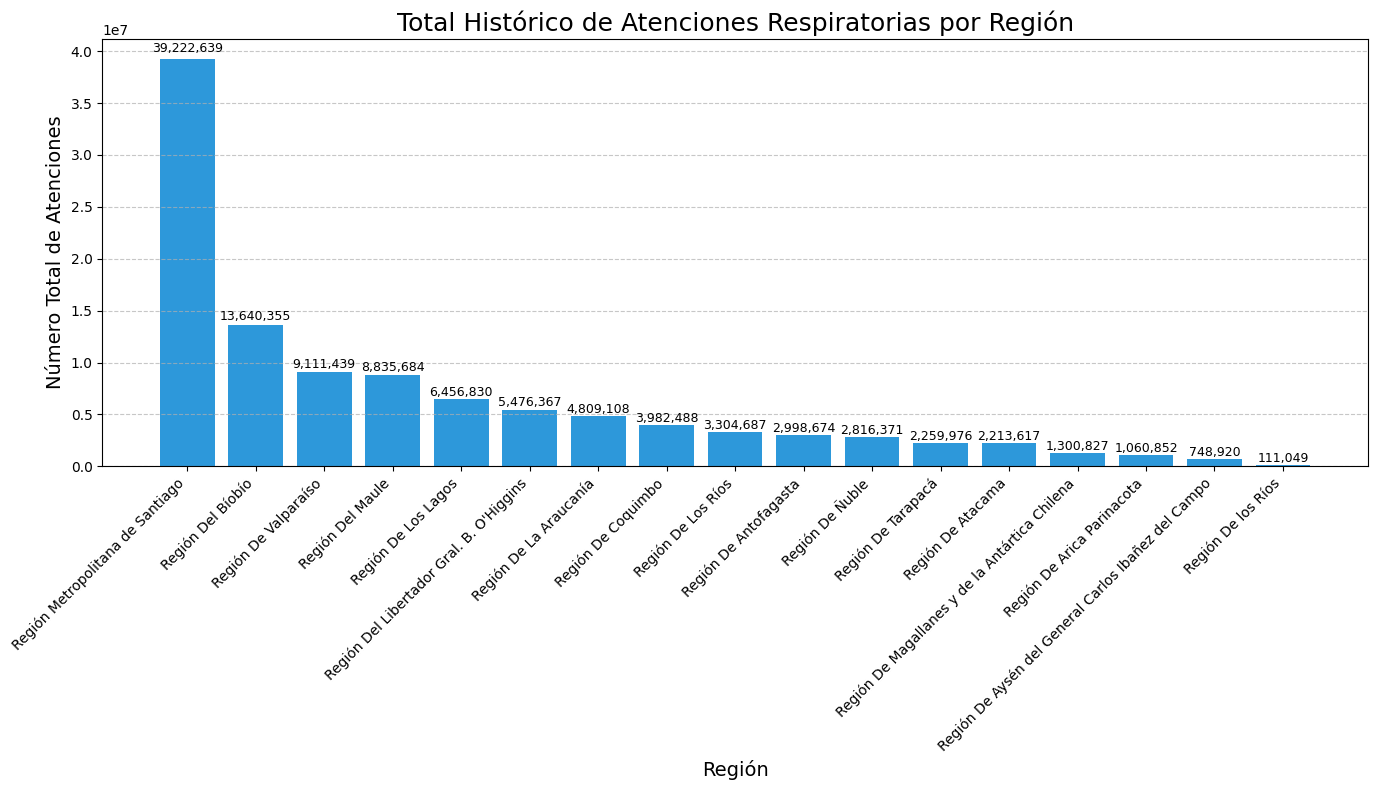


--- Ranking de Atenciones por Región (Total Histórico) ---
                                          RegionGlosa  NumTotal
16                   Región Metropolitana de Santiago  39222639
13                                  Región Del Bíobío  13640355
10                               Región De Valparaíso   9111439
15                                   Región Del Maule   8835684
6                                 Región De Los Lagos   6456830
14           Región Del Libertador Gral. B. O'Higgins   5476367
5                              Región De La Araucanía   4809108
4                                  Región De Coquimbo   3982488
7                                  Región De Los Ríos   3304687
0                               Región De Antofagasta   2998674
12                                    Región De Ñuble   2816371
9                                  Región De Tarapacá   2259976
2                                   Región De Atacama   2213617
8      Región De Magallanes y de la Antártic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agregación de Datos por Región ---
# Agrupar por la glosa de la región y sumar el total de atenciones ('NumTotal')
df_region = df.groupby('RegionGlosa')['NumTotal'].sum().reset_index()

# Ordenar de forma descendente para que las regiones más afectadas se vean primero
df_region = df_region.sort_values(by='NumTotal', ascending=False)

# --- 2. Generación del Gráfico de Barras ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    df_region['RegionGlosa'],
    df_region['NumTotal'],
    color='#2d98da' # Un color azul que destaca
)

# --- 3. Configuración Visual del Gráfico ---
plt.title('Total Histórico de Atenciones Respiratorias por Región', fontsize=18)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Número Total de Atenciones', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura

# Opcional: Añadir la cifra exacta sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + (yval * 0.01), # Un poco por encima de la barra
        f'{int(yval):,.0f}', # Formato con separadores de miles
        va='bottom',
        ha='center',
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("distribucion_por_region.png")
plt.close()

print("\n--- Ranking de Atenciones por Región (Total Histórico) ---")
print(df_region)

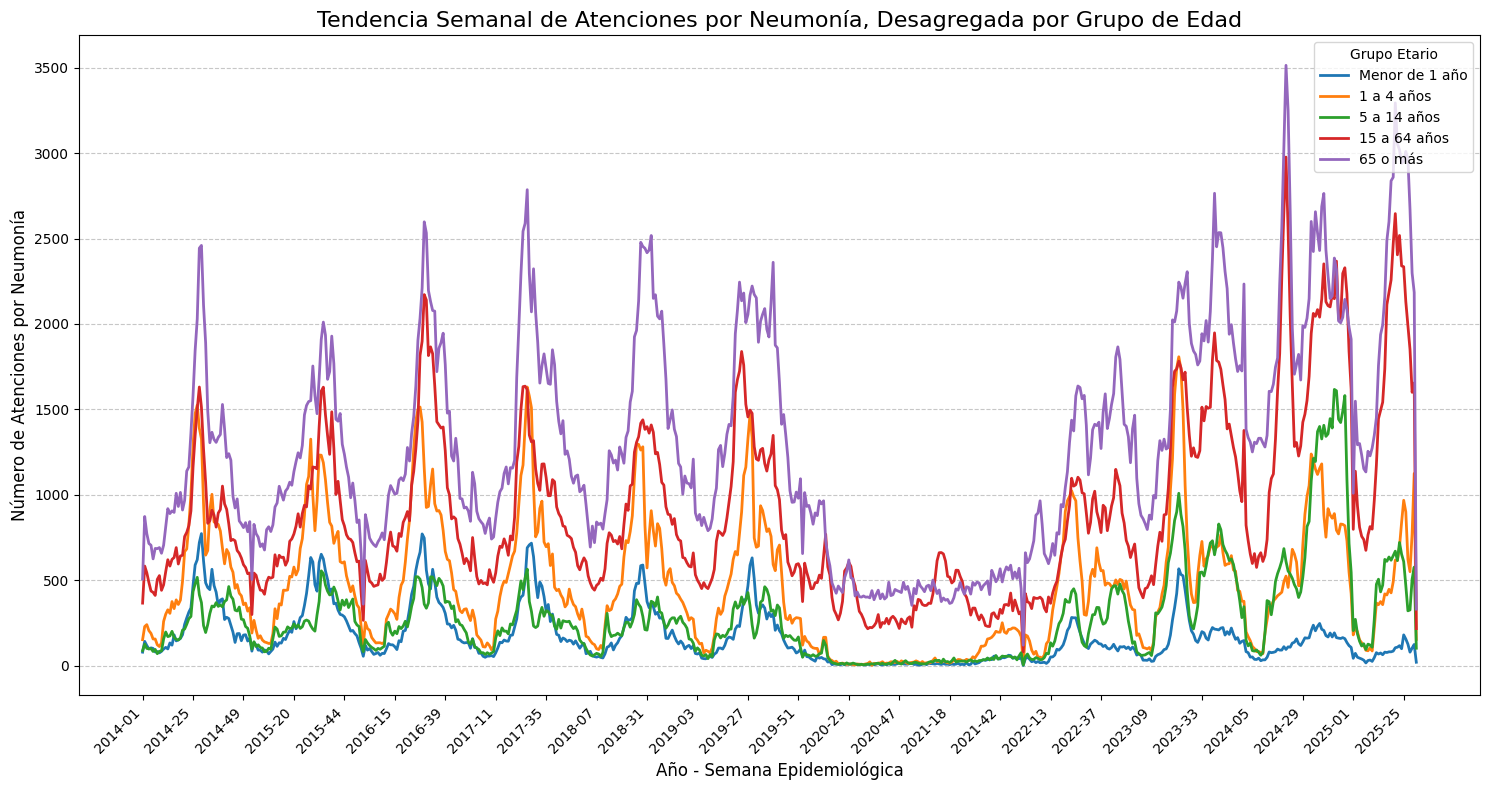


Se ha generado el gráfico 'tendencia_neumonia_por_edad.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Filtrado y Agrupación de Datos ---

# Asegurarse de que la columna 'Temporal' existe
if 'Temporal' not in df.columns:
    df['Temporal'] = df['Anio'].astype(str) + '-' + df['SemanaEstadistica'].astype(str).str.zfill(2)

# Filtrar solo los datos de Neumonía (usando la glosa exacta de la Causa)
df_neumonia = df[df['Causa'] == 'Neumonía (J12-J18)'].copy()

# Definir las columnas de edad
columnas_edad = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# Agrupar por la columna temporal y sumar los casos de Neumonía por edad
df_neumonia_edad_trend = df_neumonia.groupby('Temporal')[columnas_edad].sum().reset_index()

# Renombrar las columnas para una leyenda clara en el gráfico
df_neumonia_edad_trend.columns = ['Temporal', 'Menor de 1 año', '1 a 4 años', '5 a 14 años', '15 a 64 años', '65 o más']

# --- 2. Generación del Gráfico de Líneas Agrupadas ---
plt.figure(figsize=(15, 8))

# Iterar sobre las columnas de edad para dibujar una línea para cada grupo
for col in df_neumonia_edad_trend.columns[1:]:
    plt.plot(
        df_neumonia_edad_trend['Temporal'],
        df_neumonia_edad_trend[col],
        label=col,
        linewidth=2
    )

# --- 3. Configuración Visual del Gráfico ---
plt.title('Tendencia Semanal de Atenciones por Neumonía, Desagregada por Grupo de Edad', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número de Atenciones por Neumonía', fontsize=12)
plt.legend(title='Grupo Etario', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Manejo de etiquetas X (igual que antes para evitar saturación)
n_ticks = len(df_neumonia_edad_trend)
tick_interval = max(1, n_ticks // 25)
plt.xticks(df_neumonia_edad_trend['Temporal'][::tick_interval], rotation=45, ha='right')

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("tendencia_neumonia_por_edad.png")
plt.close()

print("\nSe ha generado el gráfico 'tendencia_neumonia_por_edad.png'.")

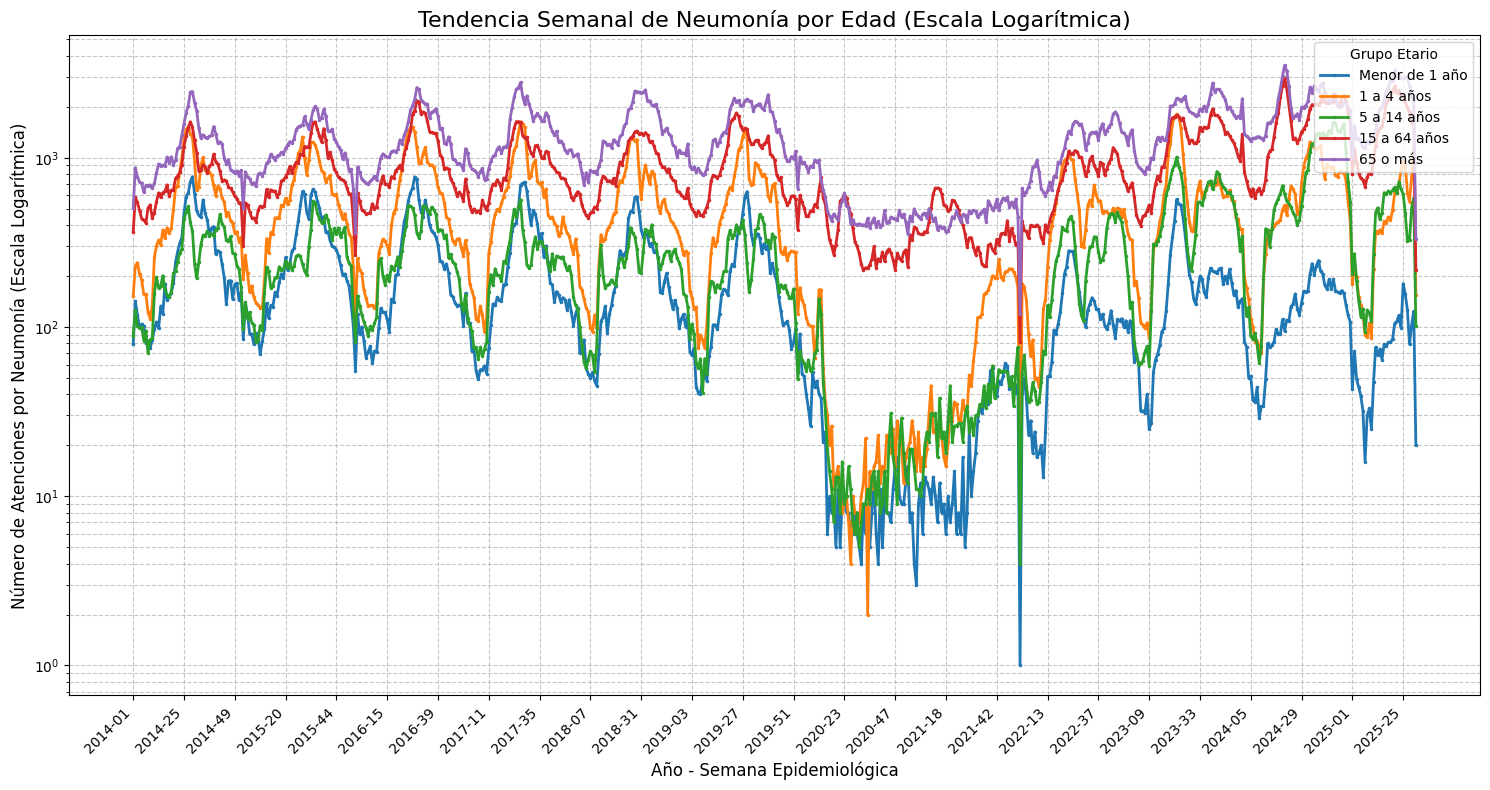

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Preparación de Datos (Reutilizando el código del Análisis 6) ---

# Asumimos que df_neumonia_edad_trend ya está creado con las columnas correctas
# df_neumonia_edad_trend.columns = ['Temporal', 'Menor de 1 año', '1 a 4 años', '5 a 14 años', '15 a 64 años', '65 o más']

# --- 2. Generación del Gráfico de Líneas Agrupadas con Eje Logarítmico ---
plt.figure(figsize=(15, 8))

for col in df_neumonia_edad_trend.columns[1:]:
    plt.plot(
        df_neumonia_edad_trend['Temporal'],
        df_neumonia_edad_trend[col],
        label=col,
        linewidth=2,
        marker='.',
        markersize=3
    )

# --- 3. CAMBIO CLAVE: Aplicar escala logarítmica al eje Y ---
plt.yscale('log')

# --- 4. Configuración Visual ---
plt.title('Tendencia Semanal de Neumonía por Edad (Escala Logarítmica)', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número de Atenciones por Neumonía (Escala Logarítmica)', fontsize=12)
plt.legend(title='Grupo Etario', loc='upper right')
plt.grid(axis='both', linestyle='--', alpha=0.7, which="both") # Mostrar grid para ambos ejes

# Manejo de etiquetas X (igual que antes para evitar saturación)
n_ticks = len(df_neumonia_edad_trend)
tick_interval = max(1, n_ticks // 25)
plt.xticks(df_neumonia_edad_trend['Temporal'][::tick_interval], rotation=45, ha='right')

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("tendencia_neumonia_logaritmica.png")
plt.close()

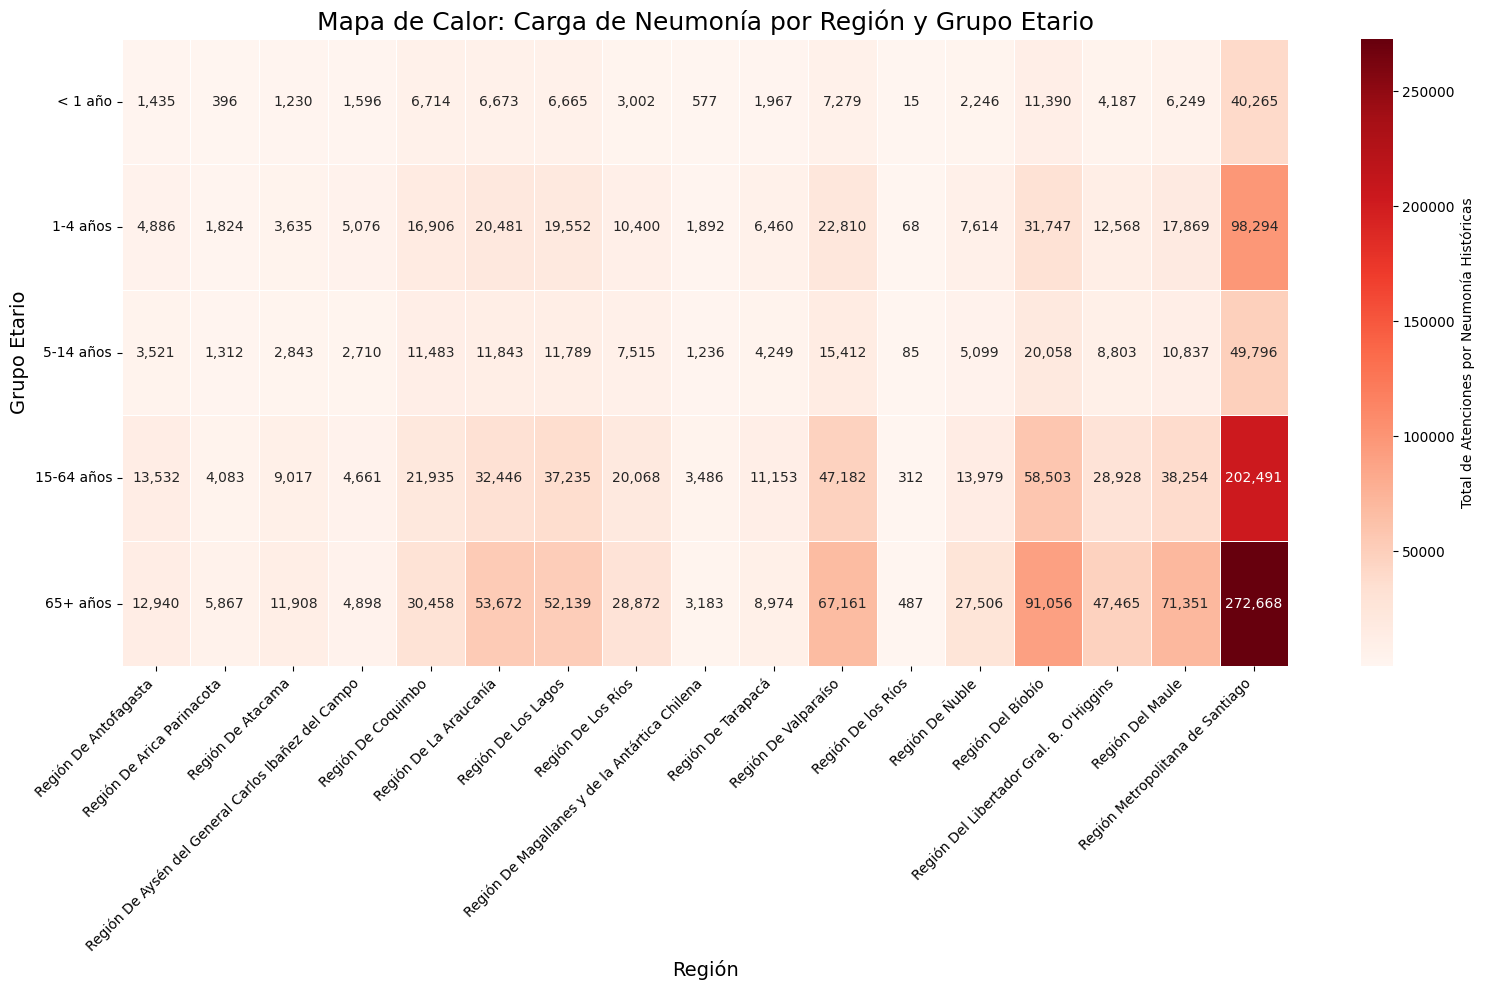

Se ha generado el Mapa de Calor 'heatmap_neumonia_region_edad.png'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Filtrado de Datos (Neumonía) ---
# Usar el filtro exacto de la Causa de Neumonía
df_neumonia = df[df['Causa'] == 'Neumonía (J12-J18)'].copy()

# --- 2. Definición de Columnas de Interés ---
columnas_edad = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# --- 3. Agregación de Datos ---
# Agrupar por la región y sumar los casos de Neumonía en todas las columnas de edad
df_heatmap_data = df_neumonia.groupby('RegionGlosa')[columnas_edad].sum()

# --- 4. Reorganizar y Renombrar para Visualización ---
# Renombrar las columnas para que sean descriptivas en el mapa
df_heatmap_data.columns = ['< 1 año', '1-4 años', '5-14 años', '15-64 años', '65+ años']

# Normalizar los datos: Transponer el DataFrame para que las Regiones sean las filas (eje Y)
# y los Grupos Etarios sean las columnas (eje X).
heatmap_matrix = df_heatmap_data.transpose()

# --- 5. Generación del Mapa de Calor ---
plt.figure(figsize=(16, 10))

# Usar Seaborn para generar el mapa de calor
# annot=True: Muestra el número exacto de casos en cada celda
# fmt=',.0f': Formato para mostrar números grandes con separadores de miles
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=',.0f',
    cmap='Reds', # 'Reds' o 'viridis' suelen ser buenos para datos de salud
    linewidths=.5,
    cbar_kws={'label': 'Total de Atenciones por Neumonía Históricas'}
)

# --- 6. Configuración Visual ---
plt.title('Mapa de Calor: Carga de Neumonía por Región y Grupo Etario', fontsize=18)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Grupo Etario', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("heatmap_neumonia_region_edad.png")
plt.close()

print("Se ha generado el Mapa de Calor 'heatmap_neumonia_region_edad.png'.")

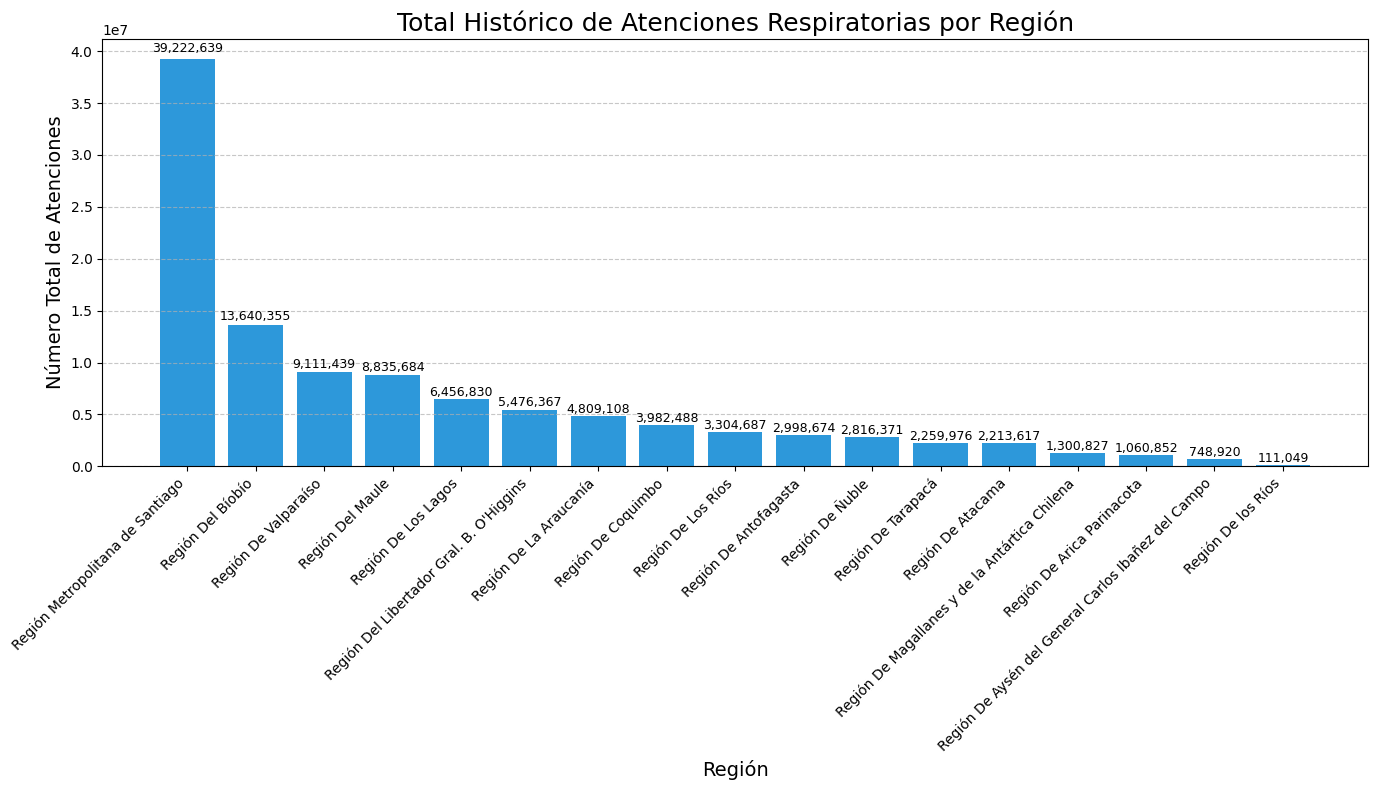


--- Ranking de Atenciones por Región (Total Histórico) ---
                                          RegionGlosa  NumTotal
16                   Región Metropolitana de Santiago  39222639
13                                  Región Del Bíobío  13640355
10                               Región De Valparaíso   9111439
15                                   Región Del Maule   8835684
6                                 Región De Los Lagos   6456830
14           Región Del Libertador Gral. B. O'Higgins   5476367
5                              Región De La Araucanía   4809108
4                                  Región De Coquimbo   3982488
7                                  Región De Los Ríos   3304687
0                               Región De Antofagasta   2998674
12                                    Región De Ñuble   2816371
9                                  Región De Tarapacá   2259976
2                                   Región De Atacama   2213617
8      Región De Magallanes y de la Antártic

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Agregación de Datos por Región ---
# Agrupar por la glosa de la región y sumar el total de atenciones ('NumTotal')
df_region = df.groupby('RegionGlosa')['NumTotal'].sum().reset_index()

# Ordenar de forma descendente para que las regiones más afectadas se vean primero
df_region = df_region.sort_values(by='NumTotal', ascending=False)

# --- 2. Generación del Gráfico de Barras ---
plt.figure(figsize=(14, 8))
bars = plt.bar(
    df_region['RegionGlosa'],
    df_region['NumTotal'],
    color='#2d98da' # Un color azul que destaca
)

# --- 3. Configuración Visual del Gráfico ---
plt.title('Total Histórico de Atenciones Respiratorias por Región', fontsize=18)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Número Total de Atenciones', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10) # Rotar etiquetas para mejor lectura

# Opcional: Añadir la cifra exacta sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2.0,
        yval + (yval * 0.01), # Un poco por encima de la barra
        f'{int(yval):,.0f}', # Formato con separadores de miles
        va='bottom',
        ha='center',
        fontsize=9
    )

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("distribucion_por_region.png")
plt.close()

print("\n--- Ranking de Atenciones por Región (Total Histórico) ---")
print(df_region)

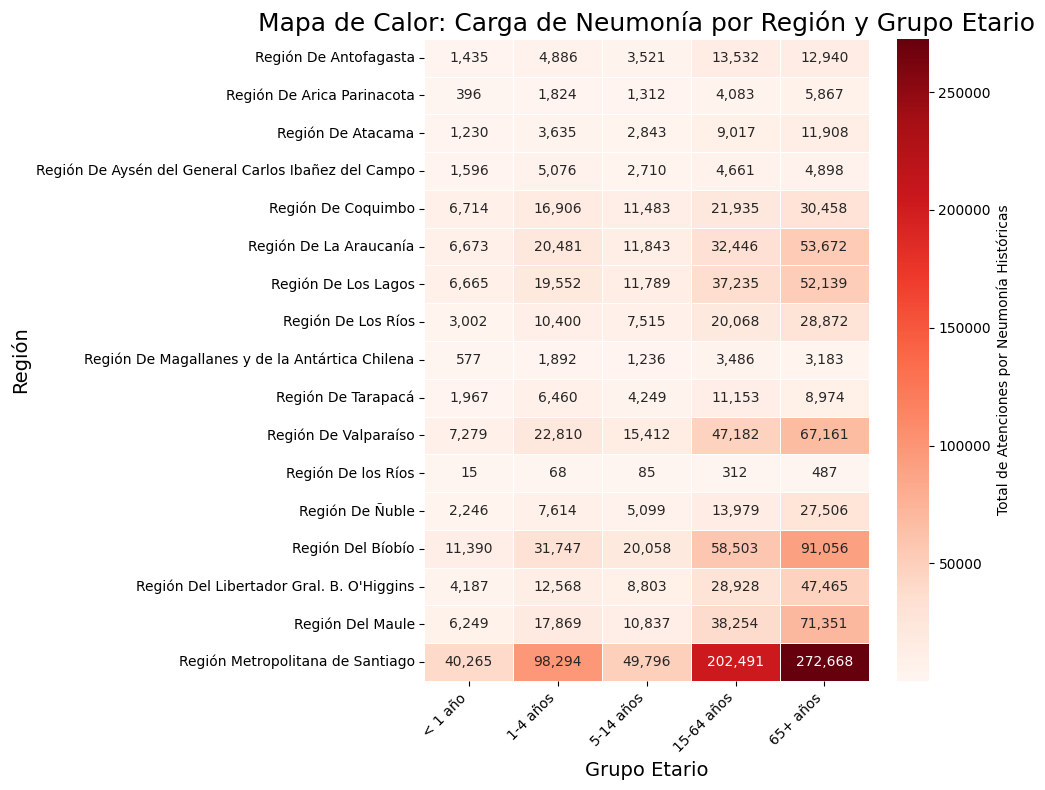

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Filtrado de Datos (Neumonía) ---
# Usar el filtro exacto de la Causa de Neumonía
df_neumonia = df[df['Causa'] == 'Neumonía (J12-J18)'].copy()

# --- 2. Definición de Columnas de Interés ---
columnas_edad = ['NumMenor1Anio', 'Num1a4Anios', 'Num5a14Anios', 'Num15a64Anios', 'Num65oMas']

# --- 3. Agregación de Datos ---
# Agrupar por la región y sumar los casos de Neumonía en todas las columnas de edad
df_heatmap_data = df_neumonia.groupby('RegionGlosa')[columnas_edad].sum()

# --- 4. Reorganizar y Renombrar para Visualización ---
# Renombrar las columnas para que sean descriptivas en el mapa
df_heatmap_data.columns = ['< 1 año', '1-4 años', '5-14 años', '15-64 años', '65+ años']

# Transponer el DataFrame para que las Regiones sean las filas (eje Y)
# y los Grupos Etarios sean las columnas (eje X).
# NOTA: Seaborn necesita los datos como una matriz o DataFrame.
heatmap_matrix = df_heatmap_data

# --- 5. Generación del Mapa de Calor ---
plt.figure(figsize=(10, 8))

# Usar Seaborn para generar el mapa de calor
# annot=True: Muestra el número exacto de casos en cada celda
# fmt=',.0f': Formato para mostrar números grandes con separadores de miles
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=',.0f',
    cmap='Reds', # 'Reds' o 'viridis' suelen ser buenos para datos de salud
    linewidths=.5,
    cbar_kws={'label': 'Total de Atenciones por Neumonía Históricas'}
)

# --- 6. Configuración Visual ---
plt.title('Mapa de Calor: Carga de Neumonía por Región y Grupo Etario', fontsize=18)
plt.xlabel('Grupo Etario', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("heatmap_neumonia_region_edad.png")
plt.close()

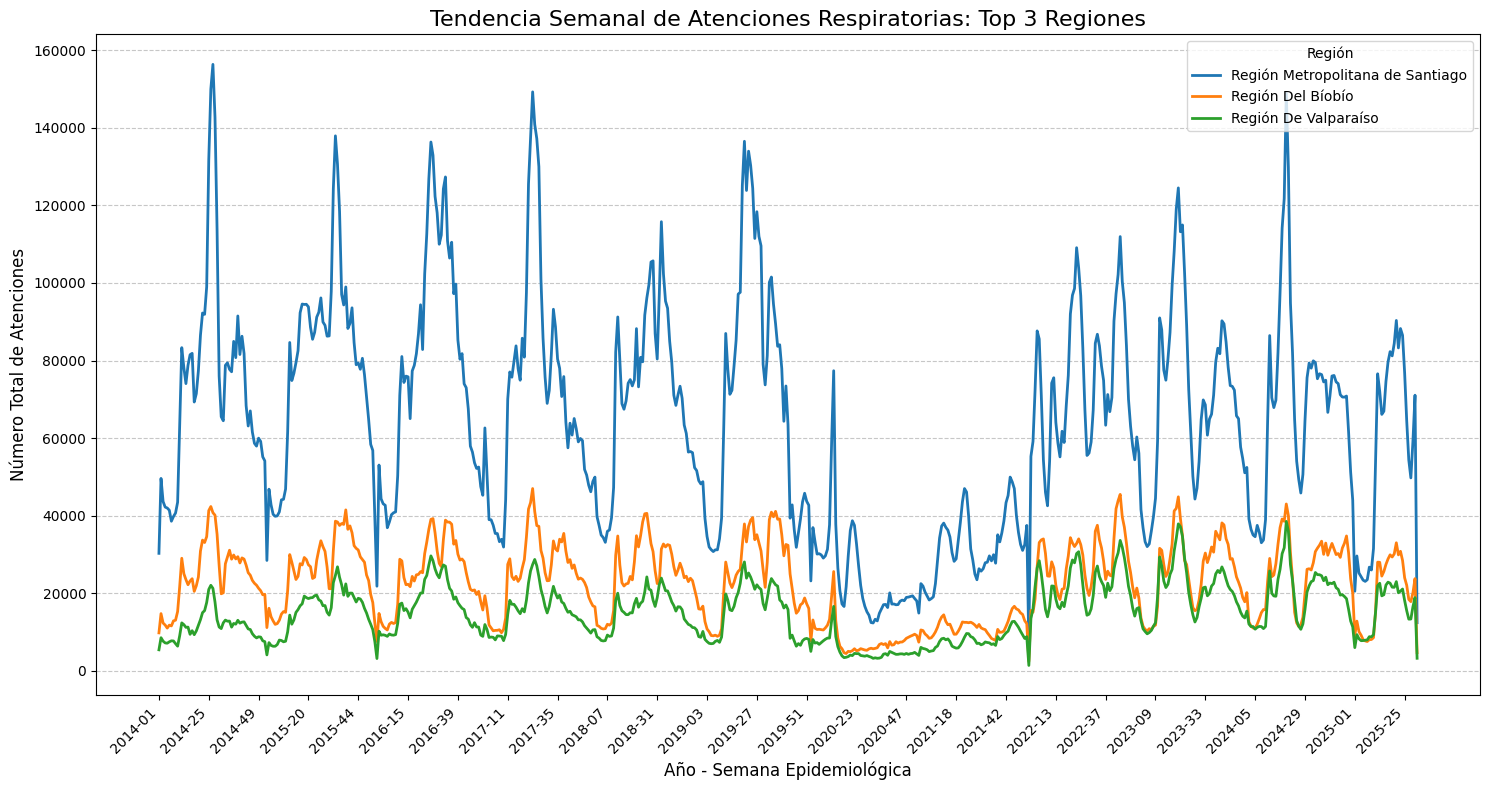


Se ha generado el gráfico 'tendencia_top_3_regiones.png' para las regiones: ['Región Metropolitana de Santiago', 'Región Del Bíobío', 'Región De Valparaíso'].


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Variables que deben venir del paso anterior ---
# **IMPORTANTE:** Reemplaza la siguiente lista con los nombres exactos de las 3 regiones más cargadas
# Obtenidos del ranking de atenciones totales.
# Ejemplo:
top_3_regiones = ['Región Metropolitana de Santiago', 'Región Del Bíobío', 'Región De Valparaíso']
# --- Fin de Variables ---

# 1. Crear la columna temporal si no existe
if 'Temporal' not in df.columns:
    df['Temporal'] = df['Anio'].astype(str) + '-' + df['SemanaEstadistica'].astype(str).str.zfill(2)

# 2. Filtrar el DataFrame para incluir solo estas 3 regiones
df_top_regiones = df[df['RegionGlosa'].isin(top_3_regiones)]

# 3. Agrupar por la semana ('Temporal') y la Región, y sumar el 'NumTotal'
df_tendencia_regional = df_top_regiones.groupby(['Temporal', 'RegionGlosa'])['NumTotal'].sum().unstack(fill_value=0)
df_tendencia_regional = df_tendencia_regional.reset_index()

# 4. Generación del Gráfico de Líneas Agrupadas
plt.figure(figsize=(15, 8))

for region in top_3_regiones:
    if region in df_tendencia_regional.columns:
        plt.plot(
            df_tendencia_regional['Temporal'],
            df_tendencia_regional[region],
            label=region,
            linewidth=2
        )

# 5. Configuración Visual del Gráfico
plt.title('Tendencia Semanal de Atenciones Respiratorias: Top 3 Regiones', fontsize=16)
plt.xlabel('Año - Semana Epidemiológica', fontsize=12)
plt.ylabel('Número Total de Atenciones', fontsize=12)
plt.legend(title='Región', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Manejo de etiquetas X (para evitar saturación)
n_ticks = len(df_tendencia_regional)
tick_interval = max(1, n_ticks // 25)
plt.xticks(df_tendencia_regional['Temporal'][::tick_interval], rotation=45, ha='right')

plt.tight_layout()
plt.show() # Muestra el gráfico en Colab
plt.savefig("tendencia_top_3_regiones.png")
plt.close()

print(f"\nSe ha generado el gráfico 'tendencia_top_3_regiones.png' para las regiones: {top_3_regiones}.")